In [8]:
import pybedtools
import matplotlib.pyplot as plt
import matplotlib_venn as vplt

In [9]:
def ven_subplot(title, sets, labels):
    plt.title(title)
    v = vplt.venn2(subsets=sets, set_labels=labels, set_colors=('w', 'w'))
    v.get_label_by_id('10').set_x(0.25)
    v.get_label_by_id('01').set_x(-.25)
    v.get_label_by_id('11').set_x(0)
    v.set_labels[0].set_position((-0.22, -0.45))
    v.set_labels[1].set_position((0.25, -0.45))


    c = vplt.venn2_circles(subsets=(2, 2, 1), linestyle='solid')
    c[0].set_radius(0.32)
    c[1].set_radius(0.32)
    c[0].set_lw(2.0)
    c[1].set_lw(2.0)
    c[0].set_color('green')
    c[1].set_color('red')
    c[0].set_alpha(0.5)
    c[1].set_alpha(0.5)
    c[0].set_edgecolor('black')
    c[1].set_edgecolor('black')

In [28]:
def plot3(title, new_features_file, catalog_features_file, validated_features_file, und_wo=True, und_v=False):
    new_features = pybedtools.BedTool(new_features_file)
    catalog_features = pybedtools.BedTool(catalog_features_file)
    validated_features = pybedtools.BedTool(validated_features_file)

    new_vs_validated = validated_features.intersect(new_features, wo=und_wo, v=und_v)
    catalog_vs_validated = validated_features.intersect(catalog_features, wo=und_wo, v=und_v)
    new_vs_catalog = catalog_features.intersect(new_features, wo=und_wo, v=und_v)

    print("new: " + str(new_features.count()) + " validated: "+ str(validated_features.count()) + " catalog:" + str(catalog_features.count()))

    plt.figure(figsize=(15,10))
    plt.subplot(2, 2, 1)
    
    atotal=validated_features.count()
    btotal=new_features.count()
    ab=new_vs_validated.count() if not und_v else atotal - new_vs_validated.count()
    a=atotal-ab
    b=btotal-ab
    ven_subplot('New Features Vs. Validated Features', (a,b,ab), ('New Calls (' + str(btotal) +')', 'Validated ('+ str(atotal) +')'))

    plt.subplot(2, 2, 2)
    
    atotal=validated_features.count()
    btotal=catalog_features.count()
    ab=catalog_vs_validated.count() if not und_v else atotal - catalog_vs_validated.count()
    a=atotal-ab
    b=btotal-ab
    ven_subplot('Catalog Vs. Validated Features', (a,b,ab), ('Catalog (' + str(btotal) +')', 'Validated ('+ str(atotal) +')'))

    plt.subplot(2, 1, 2)
    
    atotal=catalog_features.count()
    btotal=new_features.count()
    ab=new_vs_catalog.count() if not und_v else atotal - new_vs_catalog.count()
    a=atotal-ab
    b=btotal-ab
    ven_subplot('New Features Vs. Catalog', (a,b,ab), ('New Calls (' + str(btotal) +')', 'Catalog ('+ str(atotal) +')'))

    plt.suptitle(title)

    
    return new_vs_validated, catalog_vs_validated, new_vs_catalog

In [29]:
minimap2_sniffles_ins = '../../data/DBA2J/bed/50/minimap2-sniffles/DBA2J_INS.bed'
minimap2_sniffles_del = '../../data/DBA2J/bed/50/minimap2-sniffles/DBA2J_DEL.bed'

minimap2_pbsv_ins = '../../data/DBA2J/bed/50/minimap2-pbsv/DBA2J_INS.bed'
minimap2_pbsv_del = '../../data/DBA2J/bed/50/minimap2-pbsv/DBA2J_DEL.bed'

ngmlr_sniffles_ins = '../../data/DBA2J/bed/50/ngmlr-sniffles/DBA2J_INS.bed'
ngmlr_sniffles_del = '../../data/DBA2J/bed/50/ngmlr-sniffles/DBA2J_DEL.bed'

catalog_ins = '../../data/previous-catalog/50/DBA2J/catalog/remapped_DBA2J_INS.bed'
catalog_del = '../../data/previous-catalog/50/DBA2J/catalog/remapped_DBA2J_DEL.bed'

validated_ins1 = '../../data/DBA2J/validated/50/remapped_DBA_2J.H6.mm10.bed'
validated_ins2 = '../../data/DBA2J/validated/50/remapped_DBA_2J.H7.mm10.bed'
validated_del1 = '../../data/DBA2J/validated/50/remapped_DBA_2J.H1.mm10.bed'
validated_del2 = '../../data/DBA2J/validated/50/remapped_DBA_2J.H2.mm10.bed'

intersects_dir = '../../data/DBA2J/bed/50/intersects'

# Minimap2 + Sniffles

## H6 Insertions of unique sequence (de novo sequence):

new: 26533 validated: 26 catalog:9406

Output data intersect -v:
Validated vs New (INS)======>:
chr4	108451404	108451405	100/200
chr6	145486712	145486713	500
chr7	98646351	98646352	1000/1500
chr7	98768784	98768785	550
chr8	73207739	73207740	1000
chr12	109926718	109926719	50

Validated vs Previous (INS)======>:
chr3	149017827	149017828	100
chr4	108451404	108451405	100/200
chr6	145486712	145486713	500
chr7	98768784	98768785	550
chr8	73207739	73207740	1000
chr8	109550435	109550436	150
chr9	41311250	41311251	50
chr12	109926718	109926719	50
chr19	38036363	38036364	178

New vs Previous (INS - Head())======>:
chr1	3766453	3766495	2
 chr1	3948171	3948213	2
 chr1	4041437	4041479	2
 chr1	4221936	4221978	2
 chr1	4621047	4621089	2
 chr1	4664817	4664859	2
 chr1	5145111	5145153	2
 chr1	5900949	5900991	2
 chr1	6111622	6111684	22
 chr1	6176975	6177028	13
 

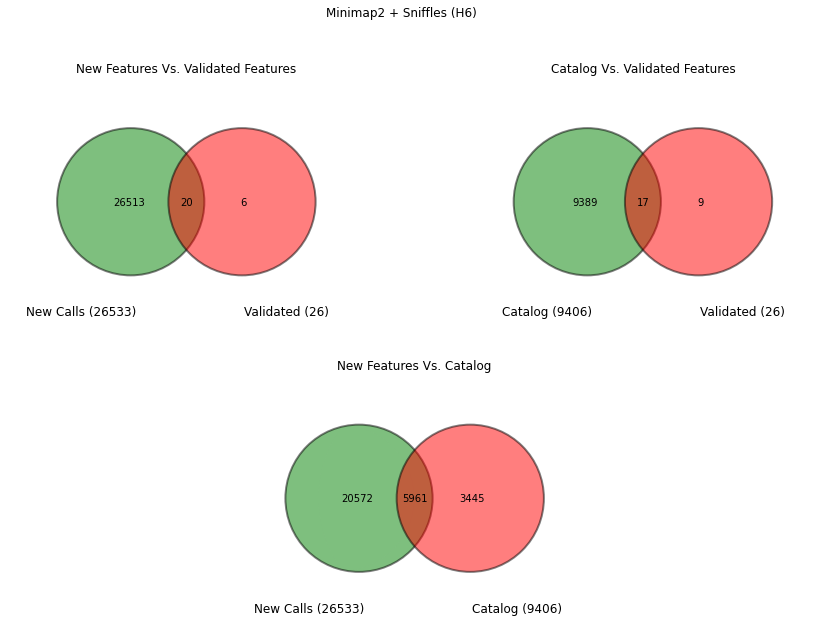

In [30]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Minimap2 + Sniffles (H6)", minimap2_sniffles_ins, catalog_ins, validated_ins1, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (INS)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (INS)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (INS - Head())======>:")
new_vs_catalog.head()

## H7 Insertions of repeat sequence:


new: 26533 validated: 59 catalog:9406

Output data intersect -v:
Validated vs New (INS)======>:
chr2	62472119	62472120	250
chr5	73058579	73058661	large
chr6	109428539	109428543	>2000
chr7	61411552	61411553	large
chr7	5185009	5185060	>2000
chr8	41795413	41795414	large
chr8	30341584	30341690	>2000
chr9	34980283	34980284	1200
chr10	46770576	46770577	large
chr10	120231460	120231463	250
chr11	30326537	30326636	>2000
chr14	87621265	87621269	>2000
chr16	44402206	44402207	large
chr16	14340377	14340394	>2000
chr17	42775169	42775189	>2000
chr17	89864796	89864821	>2000

Validated vs Previous (INS)======>:
chr1	150030739	150030740	1000
chr1	160055087	160055088	197
chr3	69514492	69514537	125
chr4	55297691	55297987	400/300
chr6	95014172	95014197	250
chr7	16143911	16144013	125
chr8	30341584	30341690	>2000
chr9	98348249	98348250	551
chr17	42775169	42775189	>2000

New vs Previous (INS - Head())======>:
chr1	3766453	3766495	2
 chr1	3948171	3948213	2
 chr1	4041437	4041479	2
 chr1	4221936	4221978	2
 chr1	

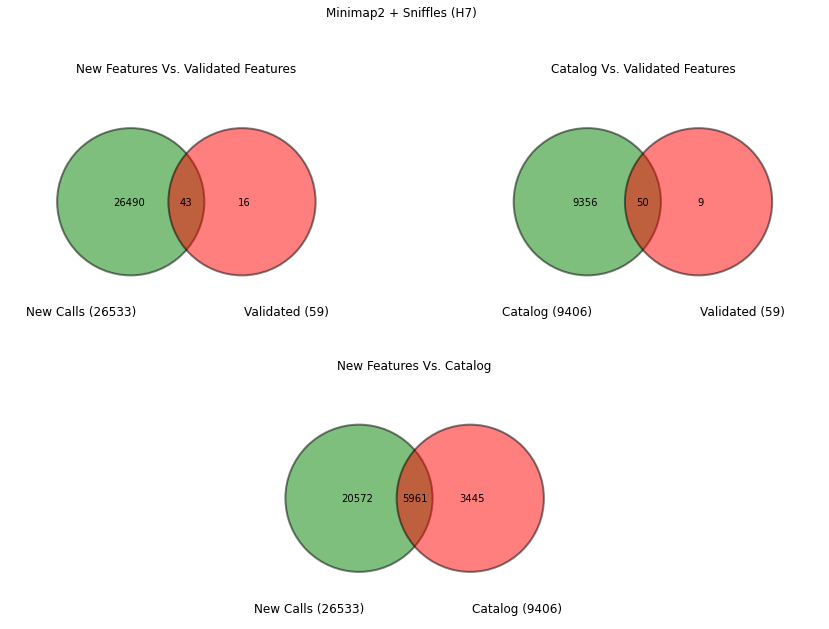

In [31]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Minimap2 + Sniffles (H7)", minimap2_sniffles_ins, catalog_ins, validated_ins2, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (INS)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (INS)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (INS - Head())======>:")
new_vs_catalog.head()

## H1 Deletions of unique sequence

new: 25958 validated: 78 catalog:17540

Output data intersect -v:
Validated vs New (DEL)======>:
chr1	8297250	8299011	1762
chr2	123201215	123201492	278
chr2	162318230	162318300	71
chr4	118459742	118462287	2546
chr5	101021103	101021194	92
chr9	105647016	105647691	676
chr10	18243681	18248375	4695
chr10	106817192	106817301	110
chr11	27327671	27328146	476
chr12	26363795	26363855	61
chr13	116290261	116290750	490
chr13	116290278	116290730	453
chr19	11928896	11928988	93

Validated vs Previous (DEL)======>:
chr2	162318230	162318300	71
chr4	114022094	114023640	1547
chr5	101021103	101021194	92
chr8	30958463	30958545	83
chr8	30958463	30958545	83
chr10	82421207	82423382	2176
chr12	26363795	26363855	61
chr12	26405593	26405656	64
chr19	11928896	11928988	93

New vs Previous (DEL - Head())======>:
chr1	4756745	4756948	203
 chr1	5853450	5854192	742
 chr1	6138143	6143143	5000
 chr1	6187020	6187198	178
 chr1	6588061	6588303	242
 chr1	7546813	7552327	5514
 chr1	8063930	8071041	7111
 chr1	8279721	8292529	1

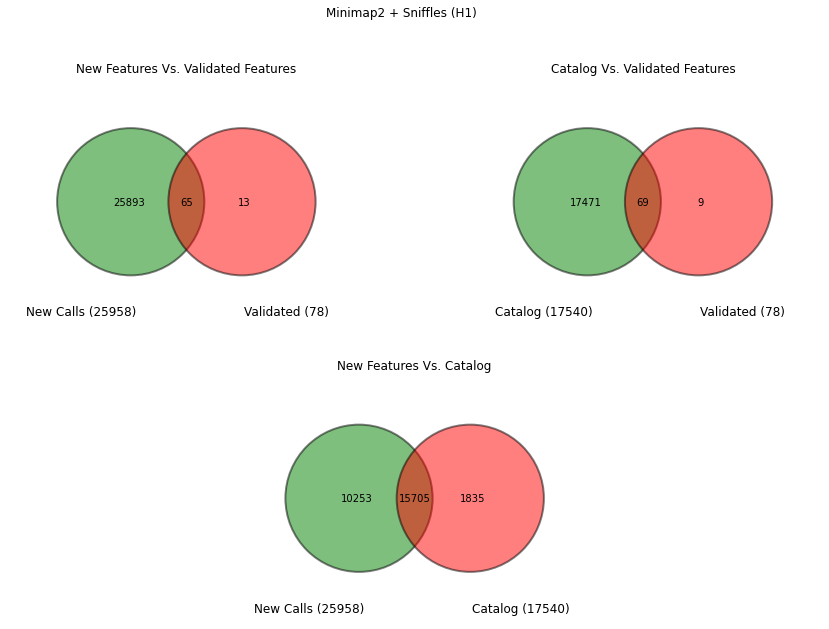

In [32]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Minimap2 + Sniffles (H1)", minimap2_sniffles_del, catalog_del, validated_del1, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (DEL)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (DEL)======>:\n" + str(catalog_vs_validated))


print("New vs Previous (DEL - Head())======>:")
new_vs_catalog.head()

## H2 Deletions of repeat sequence

new: 25958 validated: 96 catalog:17540

Output data intersect -v:
Validated vs New (DEL)======>:
chr2	100001511	100005949	4439
chr3	74707393	74708406	1014
chr4	111915048	111921270	6223
chr4	111921941	111928150	6210
chr4	138428813	138429350	538
chr10	89890849	89896109	5261
chr12	26394392	26394508	117
chr12	37197790	37202026	4237
chr12	37204757	37211564	6808
chr19	10708846	10708896	51
chr19	10721808	10721859	52
chr19	10742540	10742592	53
chr19	10742540	10742592	53
chr19	11926616	11926713	98
chr19	11928436	11928492	57

Validated vs Previous (DEL)======>:
chr8	19166321	19170053	3733
chr11	28919029	28925370	6342
chr12	26394392	26394508	117
chr17	78341783	78342639	856
chr19	10708846	10708896	51
chr19	10721808	10721859	52
chr19	10742540	10742592	53
chr19	10742540	10742592	53
chr19	11926616	11926713	98
chr19	11928436	11928492	57
chr19	12181820	12181878	59

New vs Previous (DEL - Head())======>:
chr1	4756745	4756948	203
 chr1	5853450	5854192	742
 chr1	6138143	6143143	5000
 chr1	6187020	6187198	

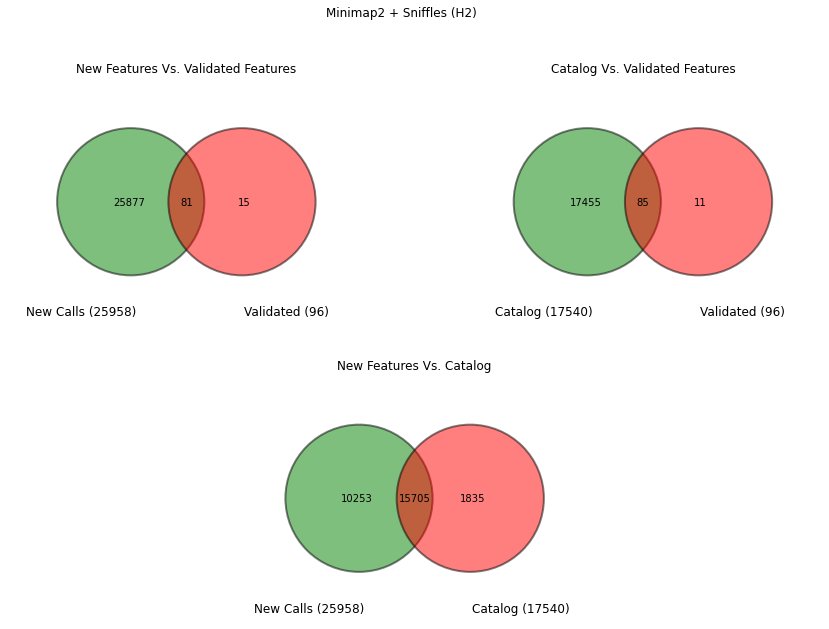

In [33]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Minimap2 + Sniffles (H2)", minimap2_sniffles_del, catalog_del, validated_del2, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (DEL)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (DEL)======>:\n" + str(catalog_vs_validated))


print("New vs Previous (DEL - Head())======>:")
new_vs_catalog.head()

# Minimap2 + pbsv


## H6 Insertions of unique sequence (de novo sequence):

new: 31896 validated: 26 catalog:9406

Output data intersect -v:
Validated vs New (INS)======>:
chr4	108451404	108451405	100/200
chr6	145486712	145486713	500
chr7	98768784	98768785	550
chr8	73207739	73207740	1000
chr12	109926718	109926719	50

Validated vs Previous (INS)======>:
chr3	149017827	149017828	100
chr4	108451404	108451405	100/200
chr6	145486712	145486713	500
chr7	98768784	98768785	550
chr8	73207739	73207740	1000
chr8	109550435	109550436	150
chr9	41311250	41311251	50
chr12	109926718	109926719	50
chr19	38036363	38036364	178

New vs Previous (INS - Head())======>:
chr1	3766453	3766495	2
 chr1	3948171	3948213	2
 chr1	5145111	5145153	2
 chr1	6243680	6243722	2
 chr1	7384789	7384831	2
 chr1	8256044	8256086	2
 chr1	9077925	9077967	2
 chr1	9705670	9705712	2
 chr1	10931296	10931338	2
 chr1	11590866	11590908	2
 

<BedTool(../../data/DBA2J/bed/50/intersects/INS_pbsv_vs_catalog.bed)>

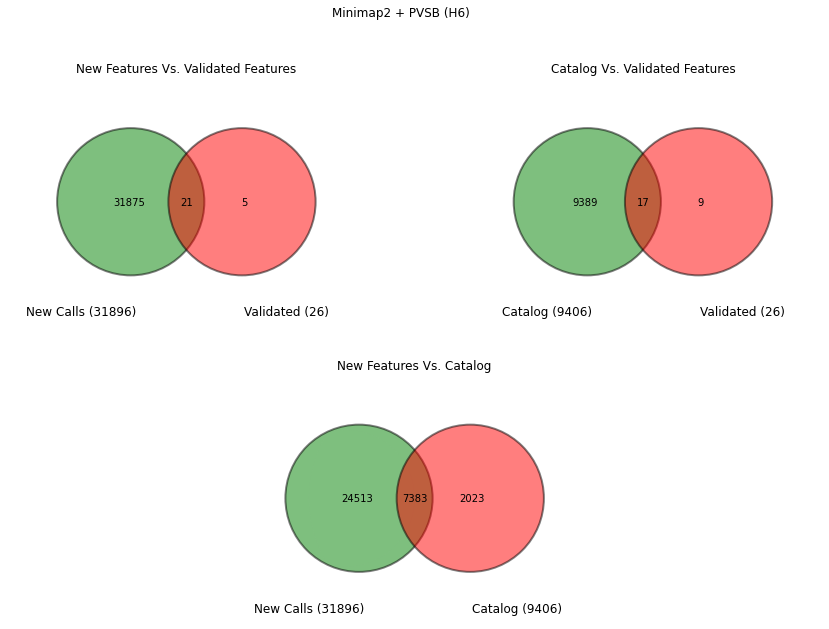

In [34]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Minimap2 + PVSB (H6)", minimap2_pbsv_ins, catalog_ins, validated_ins1, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (INS)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (INS)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (INS - Head())======>:")
new_vs_catalog.head()


new_vs_validated.saveas(intersects_dir + '/INS_pbsv_vs_H6.bed')
catalog_vs_validated.saveas(intersects_dir + '/INS_catalog_vs_H6.bed')
new_vs_catalog.saveas(intersects_dir + '/INS_pbsv_vs_catalog.bed')

## H7 Insertions of unique sequence (de novo sequence):

new: 31896 validated: 59 catalog:9406

Output data intersect -v:
Validated vs New (INS)======>:
chr2	62472119	62472120	250
chr7	61411552	61411553	large
chr8	41795413	41795414	large
chr9	34980283	34980284	1200
chr10	46770576	46770577	large
chr17	42775169	42775189	>2000
chr17	89864796	89864821	>2000

Validated vs Previous (INS)======>:
chr1	150030739	150030740	1000
chr1	160055087	160055088	197
chr3	69514492	69514537	125
chr4	55297691	55297987	400/300
chr6	95014172	95014197	250
chr7	16143911	16144013	125
chr8	30341584	30341690	>2000
chr9	98348249	98348250	551
chr17	42775169	42775189	>2000

New vs Previous (INS - Head())======>:
chr1	3766453	3766495	2
 chr1	3948171	3948213	2
 chr1	5145111	5145153	2
 chr1	6243680	6243722	2
 chr1	7384789	7384831	2
 chr1	8256044	8256086	2
 chr1	9077925	9077967	2
 chr1	9705670	9705712	2
 chr1	10931296	10931338	2
 chr1	11590866	11590908	2
 

<BedTool(../../data/DBA2J/bed/50/intersects/INS_catalog_vs_H7.bed)>

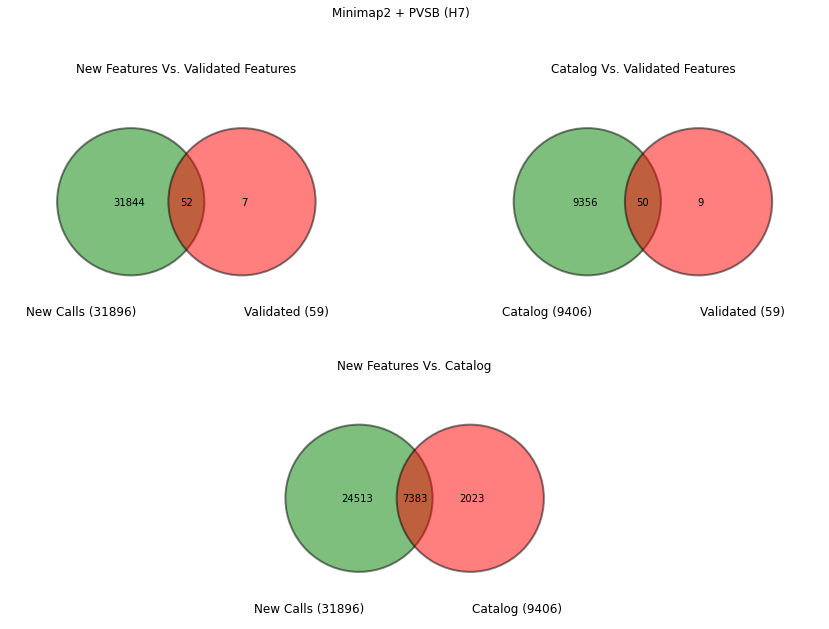

In [35]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Minimap2 + PVSB (H7)",minimap2_pbsv_ins, catalog_ins, validated_ins2, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (INS)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (INS)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (INS - Head())======>:")
new_vs_catalog.head()


new_vs_validated.saveas(intersects_dir + '/INS_pbsv_vs_H7.bed')
catalog_vs_validated.saveas(intersects_dir + '/INS_catalog_vs_H7.bed')
#new_vs_catalog.saveas(intersects_dir + '/INS_pbsv_vs_catalog.bed')

## H1 Deletions of unique sequence

new: 30401 validated: 78 catalog:17540

Output data intersect -v:
Validated vs New (DEL)======>:
chr1	8297250	8299011	1762
chr12	26363795	26363855	61
chr19	11928896	11928988	93

Validated vs Previous (DEL)======>:
chr2	162318230	162318300	71
chr4	114022094	114023640	1547
chr5	101021103	101021194	92
chr8	30958463	30958545	83
chr8	30958463	30958545	83
chr10	82421207	82423382	2176
chr12	26363795	26363855	61
chr12	26405593	26405656	64
chr19	11928896	11928988	93

New vs Previous (DEL - Head())======>:
chr1	5853450	5854192	742
 chr1	6138143	6143143	5000
 chr1	6215214	6221457	6243
 chr1	6588061	6588303	242
 chr1	8297253	8299016	1763
 chr1	16107217	16107854	637
 chr1	17346090	17346905	815
 chr1	18706344	18707888	1544
 chr1	18750666	18750876	210
 chr1	21265542	21272604	7062
 

<BedTool(../../data/DBA2J/bed/50/intersects/DEL_pbsv_vs_catalog.bed)>

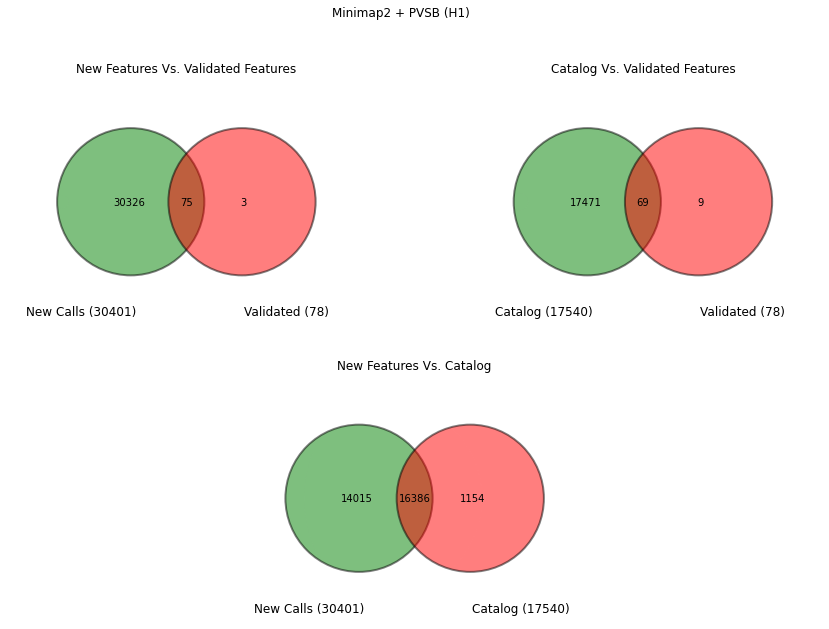

In [36]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Minimap2 + PVSB (H1)",minimap2_pbsv_del, catalog_del, validated_del1, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (DEL)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (DEL)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (DEL - Head())======>:")
new_vs_catalog.head()

new_vs_validated.saveas(intersects_dir + '/DEL_pbsv_vs_H1.bed')
catalog_vs_validated.saveas(intersects_dir + '/DEL_catalog_vs_H1.bed')
new_vs_catalog.saveas(intersects_dir + '/DEL_pbsv_vs_catalog.bed')

## H2 Deletions of unique sequence

new: 30401 validated: 96 catalog:17540

Output data intersect -v:
Validated vs New (DEL)======>:
chr4	111915048	111921270	6223
chr4	111921941	111928150	6210
chr7	98946651	98949288	2638
chr7	98946651	98949288	2638
chr11	28919029	28925370	6342
chr12	26394392	26394508	117
chr19	10708846	10708896	51
chr19	10721808	10721859	52
chr19	10742540	10742592	53
chr19	10742540	10742592	53
chr19	11926616	11926713	98
chr19	11928436	11928492	57

Validated vs Previous (DEL)======>:
chr8	19166321	19170053	3733
chr11	28919029	28925370	6342
chr12	26394392	26394508	117
chr17	78341783	78342639	856
chr19	10708846	10708896	51
chr19	10721808	10721859	52
chr19	10742540	10742592	53
chr19	10742540	10742592	53
chr19	11926616	11926713	98
chr19	11928436	11928492	57
chr19	12181820	12181878	59

New vs Previous (DEL - Head())======>:
chr1	5853450	5854192	742
 chr1	6138143	6143143	5000
 chr1	6215214	6221457	6243
 chr1	6588061	6588303	242
 chr1	8297253	8299016	1763
 chr1	16107217	16107854	637
 chr1	17346090	17346905	815
 

<BedTool(../../data/DBA2J/bed/50/intersects/DEL_catalog_vs_H2.bed)>

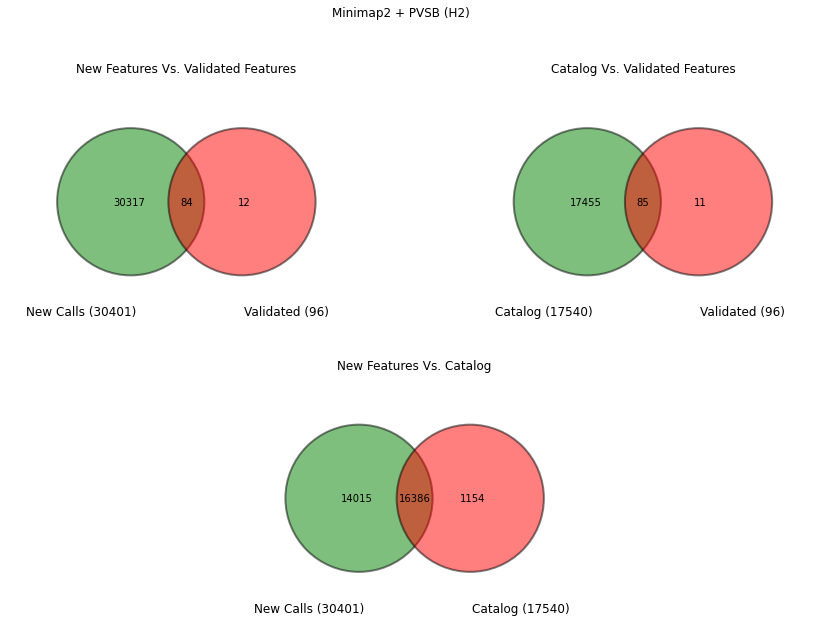

In [37]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Minimap2 + PVSB (H2)",minimap2_pbsv_del, catalog_del, validated_del2, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (DEL)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (DEL)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (DEL - Head())======>:")
new_vs_catalog.head()

new_vs_validated.saveas(intersects_dir + '/DEL_pbsv_vs_H2.bed')
catalog_vs_validated.saveas(intersects_dir + '/DEL_catalog_vs_H2.bed')
#new_vs_catalog.saveas(intersects_dir + '/DEL_pbsv_vs_catalog.bed')

# NGMLR + Sniffles


## Insertions

new: 25175 validated: 26 catalog:9406

Output data intersect -v:
Validated vs New (INS)======>:
chr4	108451404	108451405	100/200
chr6	145486712	145486713	500
chr7	98768784	98768785	550
chr8	73207739	73207740	1000
chr12	109926718	109926719	50

Validated vs Previous (INS)======>:
chr3	149017827	149017828	100
chr4	108451404	108451405	100/200
chr6	145486712	145486713	500
chr7	98768784	98768785	550
chr8	73207739	73207740	1000
chr8	109550435	109550436	150
chr9	41311250	41311251	50
chr12	109926718	109926719	50
chr19	38036363	38036364	178

New vs Previous (INS - Head())======>:
chr1	3766453	3766495	2
 chr1	3948171	3948213	2
 chr1	4221936	4221978	2
 chr1	5145111	5145153	2
 chr1	5900949	5900991	2
 chr1	6045051	6045093	2
 chr1	6176975	6177028	13
 chr1	6243680	6243722	2
 chr1	7925489	7925531	2
 chr1	8256044	8256086	2
 

<BedTool(../../data/DBA2J/bed/50/intersects/INS_pbsv_vs_catalog.bed)>

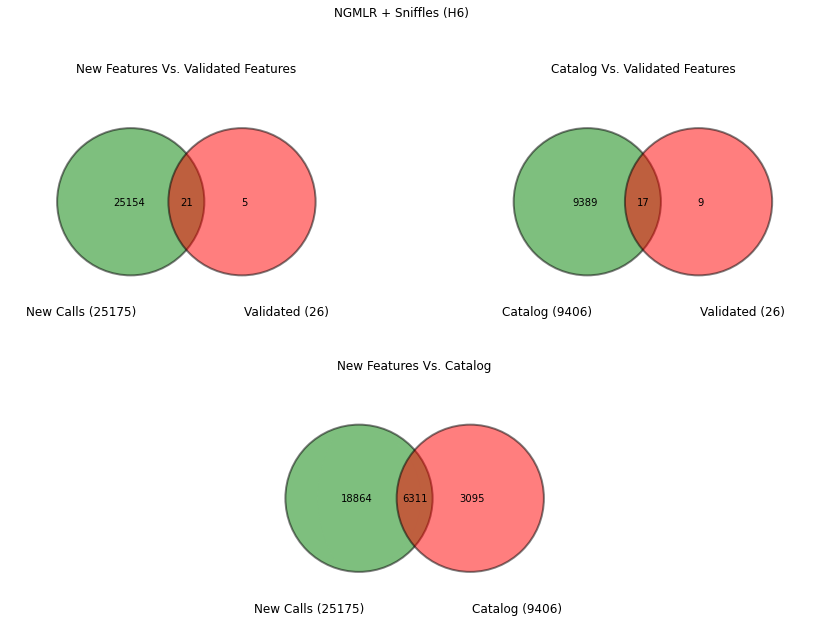

In [38]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("NGMLR + Sniffles (H6)", ngmlr_sniffles_ins, catalog_ins, validated_ins1, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (INS)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (INS)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (INS - Head())======>:")
new_vs_catalog.head()

new_vs_validated.saveas(intersects_dir + '/INS_pbsv_vs_validated.bed')
catalog_vs_validated.saveas(intersects_dir + '/INS_catalog_vs_validated.bed')
new_vs_catalog.saveas(intersects_dir + '/INS_pbsv_vs_catalog.bed')

## Deletions

new: 25311 validated: 26 catalog:9406

Output data intersect -v:
Validated vs New (DEL)======>:
chr1	175194279	175194280	203
chr2	74923175	74923176	383
chr3	149017827	149017828	100
chr4	49677490	49677491	137
chr4	108451404	108451405	100/200
chr6	145486712	145486713	500
chr7	74095624	74095625	950
chr7	98646351	98646352	1000/1500
chr7	98768784	98768785	550
chr8	109550435	109550436	150
chr9	41311250	41311251	50
chr9	69876473	69876480	650
chr10	124034632	124034633	252
chr12	109926718	109926719	50
chr12	28563054	28563056	353
chr12	92789824	92789845	587
chr13	47269693	47269694	298
chr15	20258172	20258173	150
chr15	67999841	67999869	1150
chr17	24186569	24186570	256
chr17	34565710	34565711	629

Validated vs Previous (DEL)======>:
chr3	149017827	149017828	100
chr4	108451404	108451405	100/200
chr6	145486712	145486713	500
chr7	98768784	98768785	550
chr8	73207739	73207740	1000
chr8	109550435	109550436	150
chr9	41311250	41311251	50
chr12	109926718	109926719	50
chr19	38036363	38036364	178

New vs Pr

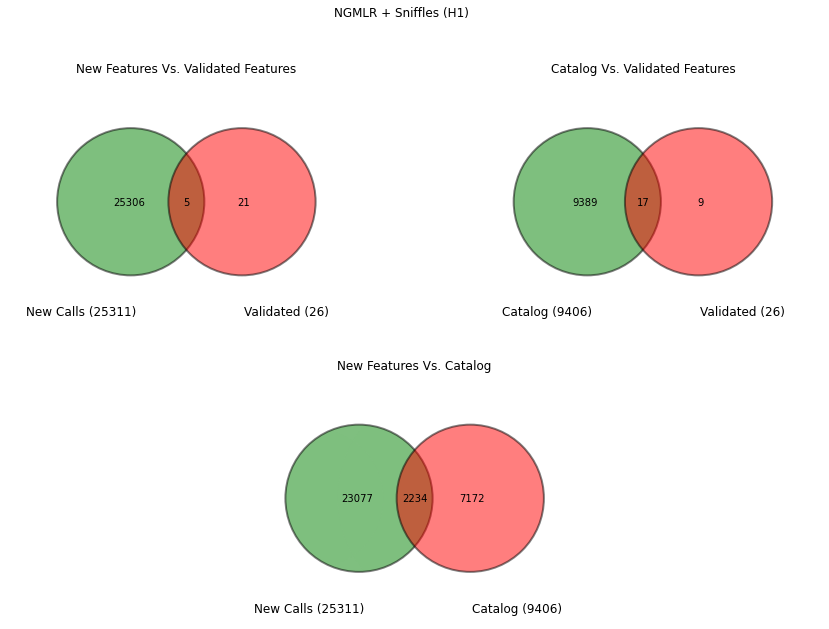

In [39]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("NGMLR + Sniffles (H1)", ngmlr_sniffles_del, catalog_ins, validated_ins1, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (DEL)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (DEL)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (DEL - Head())======>:")
new_vs_catalog.head()
